<a href="https://colab.research.google.com/github/RMoulla/MMD/blob/main/TP_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration et Entraînement d'Embeddings Word2Vec avec Gensim**
Dans ce TP, nous allons explorer les embeddings de mots en deux étapes. Dans un premier temps, nous utiliserons un modèle Word2Vec pré-entraîné afin de comprendre comment les relations sémantiques entre les mots sont capturées. Nous analyserons des similarités, des analogies, et visualiserons ces relations dans l'espace vectoriel. Ensuite, dans la seconde partie, nous allons entraîner notre propre modèle Word2Vec sur le corpus Reuters, un ensemble d'articles économiques et financiers. L'objectif est de comprendre le processus d'entraînement d'un modèle Word2Vec et de comparer les relations sémantiques et analogiques obtenues avec un corpus spécifique. À travers ces deux étapes, nous développerons une compréhension pratique des embeddings de mots et de leur utilité dans des tâches de traitement du langage naturel.

## Outils :
* **Python**
* **Gensim** pour Word2Vec
* **NLTK** pour le corpus Reuters
* **Matplotlib** pour les visualisations

---

## **Partie 1 : Explorer un modèle Word2Vec pré-entraîné (Gensim)**
Dans cette partie, nous allons utiliser un modèle Word2Vec déjà pré-entraîné pour explorer des similarités et des relations sémantiques entre les mots.

**Étape 1** : Charger un modèle Word2Vec pré-entraîné
Nous allons utiliser le modèle Google News Word2Vec, qui a été entraîné sur une vaste collection de textes issus de Google News (environ 100 milliards de mots).

In [ ]:
import gensim.downloader as api

# Charger le modèle pré-entraîné Google News Word2Vec
model = api.load('word2vec-google-news-300')

# Vérifier la taille du vocabulaire
print(f"Vocabulaire du modèle : {len(model.key_to_index)} mots")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulaire du modèle : 3000000 mots


**Étape 2** : Explorer des similarités entre les mots

In [ ]:
# Trouver les mots les plus similaires à "king"
similar_words = model.most_similar('king')
print(similar_words)


[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


In [ ]:
# Effectuer des analogies
analogy = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(analogy)


[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]


In [ ]:
analogy = model.most_similar(positive=['woman', 'doctor'], negative=['man'])
print(analogy)

[('gynecologist', 0.7093892097473145), ('nurse', 0.6477287411689758), ('doctors', 0.6471460461616516), ('physician', 0.6438996195793152), ('pediatrician', 0.6249487996101379), ('nurse_practitioner', 0.6218312978744507), ('obstetrician', 0.6072013974189758), ('ob_gyn', 0.5986713171005249), ('midwife', 0.5927063226699829), ('dermatologist', 0.5739566683769226)]


**Étape 3** : Visualisation des embeddings

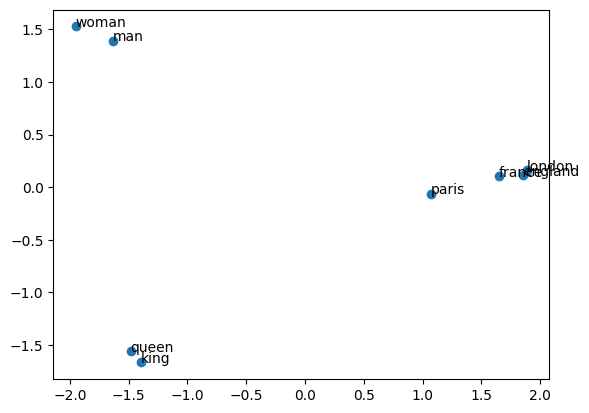

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sélectionner des mots pour visualiser leurs embeddings
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']
embeddings = [model[word] for word in words]

# Réduction de dimension à 2D avec PCA
pca = PCA(n_components=2)
result = pca.fit_transform(embeddings)

# Visualisation des points
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## **Partie 2 : Entraîner un modèle Word2Vec sur le corpus Reuters**

Dans cette partie, vous allez entraîner votre propre modèle Word2Vec en utilisant le corpus Reuters disponible dans NLTK.

**Étape 1** : Chargemer des données.


In [ ]:
import nltk
from nltk.corpus import reuters

# Télécharger et charger le corpus
nltk.download('reuters')

# Exemple de texte du corpus
corpus = [reuters.raw(fileid) for fileid in reuters.fileids()]


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Etape 2 : Prétraiter les données.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Prétraitement des documents
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

processed_corpus = [preprocess_text(text) for text in corpus]

# Compter le nombre total de tokens dans tout le corpus
total_tokens = sum(len(tokens) for tokens in processed_corpus)

# Afficher le nombre total de tokens
print(f"Nombre total de tokens dans le corpus Reuters : {total_tokens}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nombre total de tokens dans le corpus Reuters : 838833


**Etape 3** : Entraîner un modèle Word2Vec.

In [ ]:
from gensim.models import Word2Vec

# Entraînement du modèle Word2Vec
model = Word2Vec(processed_corpus, vector_size=100, window=5, min_count=5, sg=0)

**Etape 4** : Trouver des analygies sémantiques.

In [ ]:
similar_words = model.wv.most_similar('oil')
print(similar_words)

[('kernel', 0.6914666295051575), ('natural', 0.6843040585517883), ('gasoline', 0.6841670274734497), ('deodorised', 0.6819249391555786), ('light', 0.6632283329963684), ('crude', 0.6393625140190125), ('condensate', 0.6270737051963806), ('throughput', 0.6247256398200989), ('fuel', 0.623727023601532), ('olein', 0.621740996837616)]
